<a href="https://colab.research.google.com/github/kairamilanifitria/NLP-A/blob/main/Project%201%20Sentiment%20Analysis/Lemmitize_Without_Stopwords_Process_(Random_Forest_%2B_LSTM_with_Auto_Hyperparameter_Tuning).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3. Text Modeling With Lemmitize With Random Forest ✅

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_colwidth', None)

In [ ]:
df = pd.read_csv('/content/text_lemmatize_1(Kevin) (1).csv')
df.head()

,sentimen,tweet,tweet_clean
0,negatif,"Kata @prabowo Indonesia tidak dihargai bangsa asing! Berita ini ðŸ‘‡ pasti hoax buatan penguasa, ya kan @rockygerung?ðŸ˜œ https://twitter.com/mediaindonesia/status/1117575436337160192?s=21Â â€¦",kata prabowo indonesia tidak harga bangsa asing berita ini pasti hoax buat kuasa ya kan rockygerung
1,netral,"Batuan Langka, Tasbih Jokowi Hadiah dari Habib Luthfi Seharga Mercy? http://dlvr.it/R2pvZVÂ",batu langka tasbih jokowi hadiah dari habib luthfi harga mercy
2,netral,"Di era Jokowi, ekonomi Indonesia semakin baik. #01IndonesiaMaju #JokowiLagi #JokowiMenangTotalDebat pic.twitter.com/W2ythnxsTp",di era jokowi ekonomi indonesia makin baik 01 indonesia maju jokowi lagi jokowi menang total debat
3,positif,"Bagi Sumatera Selatan, Asian Games berdampak pd ekonomi langsung diprediksi mencapai 18,5 triliun. Indonesia maju, Jokowi hebat!",bagi sumatera selatan asi games dampak pd ekonomi langsung prediksi capai 18 5 triliun indonesia maju jokowi hebat
4,negatif,"Negara kita ngutang buat bngun infrastruktur yang udah dipake masyarakat, terus masyarakatnya ngeluh karena negara ngutang, setiap negara itu pasti ngutang, utang bisa dibayar kalo negara dapet penghasilan. Penghasilan negara itu ya dari pajak",negara kita ngutang buat bngun infrastruktur yang udah dipake masyarakat terus masyarakat ngeluh karena negara ngutang tiap negara itu pasti ngutang utang bisa bayar kalo negara dapet hasil hasil negara itu ya dari pajak


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1815 entries, 0 to 1814
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   sentimen     1815 non-null   object
 1   tweet        1815 non-null   object
 2   tweet_clean  1815 non-null   object
dtypes: object(3)
memory usage: 42.7+ KB


In [ ]:
df

,sentimen,tweet,tweet_clean
0,negatif,"Kata @prabowo Indonesia tidak dihargai bangsa asing! Berita ini ðŸ‘‡ pasti hoax buatan penguasa, ya kan @rockygerung?ðŸ˜œ https://twitter.com/mediaindonesia/status/1117575436337160192?s=21Â â€¦",kata prabowo indonesia tidak harga bangsa asing berita ini pasti hoax buat kuasa ya kan rockygerung
1,netral,"Batuan Langka, Tasbih Jokowi Hadiah dari Habib Luthfi Seharga Mercy? http://dlvr.it/R2pvZVÂ",batu langka tasbih jokowi hadiah dari habib luthfi harga mercy
2,netral,"Di era Jokowi, ekonomi Indonesia semakin baik. #01IndonesiaMaju #JokowiLagi #JokowiMenangTotalDebat pic.twitter.com/W2ythnxsTp",di era jokowi ekonomi indonesia makin baik 01 indonesia maju jokowi lagi jokowi menang total debat
3,positif,"Bagi Sumatera Selatan, Asian Games berdampak pd ekonomi langsung diprediksi mencapai 18,5 triliun. Indonesia maju, Jokowi hebat!",bagi sumatera selatan asi games dampak pd ekonomi langsung prediksi capai 18 5 triliun indonesia maju jokowi hebat
4,negatif,"Negara kita ngutang buat bngun infrastruktur yang udah dipake masyarakat, terus masyarakatnya ngeluh karena negara ngutang, setiap negara itu pasti ngutang, utang bisa dibayar kalo negara dapet penghasilan. Penghasilan negara itu ya dari pajak",negara kita ngutang buat bngun infrastruktur yang udah dipake masyarakat terus masyarakat ngeluh karena negara ngutang tiap negara itu pasti ngutang utang bisa bayar kalo negara dapet hasil hasil negara itu ya dari pajak
...,...,...,...
1810,netral,Negarawan sejati sll bangga dan mengedepankan harga diri bangsanya yg berdaulat #2019GantiPresiden,negarawan sejati sll bangga dan depan harga diri bangsa yg daulat 2019 ganti presiden
1811,netral,1. HRS ceramah di Damai Indonesiaku 2. Perekonomian makin membaik. #PutihkanGBK,1 hrs ceramah di damai indonesia 2 ekonomi makin baik putih gbk
1812,netral,Mari bangun bangsa dgn mendukung perekonomian negara bersama Pak Jokowi. Ayo kerja! https://twitter.com/KaskusLoker/status/1111643312241295363Â â€¦,mari bangun bangsa dgn dukung ekonomi negara sama pak jokowi ayo kerja
1813,netral,"Bantu majukan perekonomian bangsa bersama Pak Jokowi, yuk! https://twitter.com/BKNSquare/status/1113655944955588610Â â€¦",bantu maju ekonomi bangsa sama pak jokowi yuk


In [ ]:
# Assuming you have already lemmatized your text
lemmatized_texts = df['tweet_clean']
sentiment_labels = df['sentimen']

# Convert sentiment labels to numeric format
label_mapping = {'negatif': 0, 'netral': 1, 'positif': 2}
numeric_labels = [label_mapping[label] for label in sentiment_labels]

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Initialize CountVectorizer
cv_vectorizer = CountVectorizer()

# Fit and transform the lemmatized text
X = cv_vectorizer.fit_transform(lemmatized_texts)

# Convert to array if you want to see the result in array format
vectorized_array = X.toarray()

# Get feature names (vocabulary terms)
feature_names = cv_vectorizer.get_feature_names_out()

# Display the vectorized text and feature names
print("Feature Names:", feature_names)
print("Vectorized Array:\n", vectorized_array)

Feature Names: ['000' '01' '01ndonesia' ... 'zippo' 'zon' 'zonk']
Vectorized Array:
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
cv_vectorizer.vocabulary_

{'kata': 2316,
 'prabowo': 4038,
 'indonesia': 1946,
 'tidak': 5093,
 'harga': 1775,
 'bangsa': 514,
 'asing': 410,
 'berita': 649,
 'ini': 1979,
 'pasti': 3790,
 'hoax': 1851,
 'buat': 835,
 'kuasa': 2635,
 'ya': 5491,
 'kan': 2272,
 'rockygerung': 4301,
 'batu': 559,
 'langka': 2710,
 'tasbih': 4965,
 'jokowi': 2178,
 'hadiah': 1739,
 'dari': 1073,
 'habib': 1729,
 'luthfi': 2851,
 'mercy': 3126,
 'di': 1152,
 'era': 1426,
 'ekonomi': 1377,
 'makin': 2902,
 'baik': 483,
 '01': 1,
 'maju': 2886,
 'lagi': 2682,
 'menang': 3081,
 'total': 5161,
 'debat': 1092,
 'bagi': 469,
 'sumatera': 4840,
 'selatan': 4534,
 'asi': 407,
 'games': 1567,
 'dampak': 1062,
 'pd': 3806,
 'langsung': 2712,
 'prediksi': 4059,
 'capai': 904,
 '18': 31,
 'triliun': 5190,
 'hebat': 1799,
 'negara': 3384,
 'kita': 2489,
 'ngutang': 3507,
 'bngun': 760,
 'infrastruktur': 1968,
 'yang': 5510,
 'udah': 5286,
 'dipake': 1216,
 'masyarakat': 3013,
 'terus': 5059,
 'ngeluh': 3456,
 'karena': 2291,
 'tiap': 5089,
 'it

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

import gensim.downloader as gensim_api
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.utils import to_categorical
import transformers
import torch
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# ---------------------------- RANDOM FOREST ----------------------------

# 1. Split the data into training and testing sets
X = vectorized_array
y = numeric_labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

# Set up the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],          # Number of trees
    'max_depth': [None, 10, 20, 30],         # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],         # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],           # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt'],        # The number of features to consider when looking for the best split
    'bootstrap': [True, False]               # Whether bootstrap samples are used when building trees
}

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV with Random Forest and the parameter grid
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best Random Forest model after tuning
best_rf_model = grid_search.best_estimator_

# Print the best parameters and the best score
print("Best Parameters for Random Forest:", grid_search.best_params_)
print("Best Random Forest Score:", grid_search.best_score_)

X_train shape: (1452, 5556)
X_test shape: (363, 5556)
Fitting 3 folds for each of 432 candidates, totalling 1296 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
648 fits failed out of a total of 1296.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
648 fits failed with the following e

Best Parameters for Random Forest: {'bootstrap': False, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}
Best Random Forest Score: 0.5943526170798897


Accuracy: 0.6170798898071626
Classification Report:
               precision    recall  f1-score   support

    negative       0.61      0.67      0.64       115
     neutral       0.60      0.69      0.64       118
    positive       0.64      0.51      0.57       130

    accuracy                           0.62       363
   macro avg       0.62      0.62      0.62       363
weighted avg       0.62      0.62      0.61       363

Confusion Matrix:
 [[77 23 15]
 [15 81 22]
 [34 30 66]]


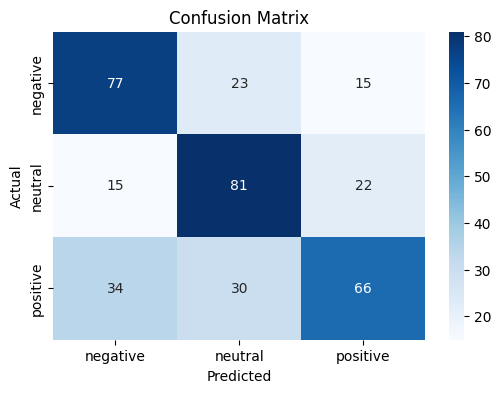

In [ ]:
# Evaluate the tuned Random Forest on the test data
y_pred = best_rf_model.predict(X_test)

# Print classification report and accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=['negative', 'neutral', 'positive']))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Visualize the confusion matrix using seaborn heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['negative', 'neutral', 'positive'], yticklabels=['negative', 'neutral', 'positive'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

### LSTM

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_colwidth', None)

In [2]:
df = pd.read_csv('/content/lemmatize.csv')
df.head()

,sentimen,tweet,tweet_clean
0,negatif,"Kata @prabowo Indonesia tidak dihargai bangsa asing! Berita ini ðŸ‘‡ pasti hoax buatan penguasa, ya kan @rockygerung?ðŸ˜œ https://twitter.com/mediaindonesia/status/1117575436337160192?s=21Â â€¦",kata prabowo indonesia tidak harga bangsa asing berita ini pasti hoax buat kuasa ya kan rockygerung
1,netral,"Batuan Langka, Tasbih Jokowi Hadiah dari Habib Luthfi Seharga Mercy? http://dlvr.it/R2pvZVÂ",batu langka tasbih jokowi hadiah dari habib luthfi harga mercy
2,netral,"Di era Jokowi, ekonomi Indonesia semakin baik. #01IndonesiaMaju #JokowiLagi #JokowiMenangTotalDebat pic.twitter.com/W2ythnxsTp",di era jokowi ekonomi indonesia makin baik 01 indonesia maju jokowi lagi jokowi menang total debat
3,positif,"Bagi Sumatera Selatan, Asian Games berdampak pd ekonomi langsung diprediksi mencapai 18,5 triliun. Indonesia maju, Jokowi hebat!",bagi sumatera selatan asi games dampak pd ekonomi langsung prediksi capai 18 5 triliun indonesia maju jokowi hebat
4,negatif,"Negara kita ngutang buat bngun infrastruktur yang udah dipake masyarakat, terus masyarakatnya ngeluh karena negara ngutang, setiap negara itu pasti ngutang, utang bisa dibayar kalo negara dapet penghasilan. Penghasilan negara itu ya dari pajak",negara kita ngutang buat bngun infrastruktur yang udah dipake masyarakat terus masyarakat ngeluh karena negara ngutang tiap negara itu pasti ngutang utang bisa bayar kalo negara dapet hasil hasil negara itu ya dari pajak


In [3]:
# Assuming you have already lemmatized your text
lemmatized_texts = df['tweet_clean']
sentiment_labels = df['sentimen']

# Convert sentiment labels to numeric format
label_mapping = {'negatif': 0, 'netral': 1, 'positif': 2}
numeric_labels = [label_mapping[label] for label in sentiment_labels]

In [4]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Initialize CountVectorizer
cv_vectorizer = CountVectorizer()

# Fit and transform the lemmatized text
X = cv_vectorizer.fit_transform(lemmatized_texts)

# Convert to array if you want to see the result in array format
vectorized_array = X.toarray()

# Get feature names (vocabulary terms)
feature_names = cv_vectorizer.get_feature_names_out()

# Display the vectorized text and feature names
print("Feature Names:", feature_names)
print("Vectorized Array:\n", vectorized_array)

Feature Names: ['000' '01' '01ndonesia' ... 'zippo' 'zon' 'zonk']
Vectorized Array:
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [6]:
# ---------------------------- LSTM ----------------------------
from sklearn.model_selection import train_test_split


# Convert X (decribed in vectorization part) to dense array
X_array = vectorized_array

# Ensure labels are in array format
y = np.array(numeric_labels)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_array, y, test_size=0.2, random_state=42)

# Reshape X_train for LSTM: (samples, time_steps, features)
X_train = np.expand_dims(X_train, axis=2)
X_test = np.expand_dims(X_test, axis=2)

print("X_train shape:", X_train.shape)  # Expected: (samples, features, 1)
print("X_test shape:", X_test.shape)

X_train shape: (1452, 5556, 1)
X_test shape: (363, 5556, 1)


In [8]:
!pip install scikit-learn
!pip install nlp_id
!pip install keras-tuner

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 95.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 402.6/402.6 kB 31.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 76.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 104.7 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9656 sha256=94314508ed1c6dc1ed30b24574781cc8be5d8a9988448463808fd4b3749ba439
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget
  Attempting uninstall: nltk
    Found existing installation: nltk 3.8.1
    Uninstalling nltk-3.8.1:
      Successfully uninstalled nltk-3.8.1
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.5.2
    Uninstalling scikit-learn-1.5.2:
      Successfully uninstalled scikit-learn-1.5.2
  Attempting uninstall: huggingface-hub
    Found 

In [9]:
import keras_tuner as kt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Define the LSTM model with hyperparameters to tune
def build_lstm_model(hp):
    model = Sequential()

    # LSTM layer with tunable number of units
    model.add(LSTM(
        units=hp.Int('units', min_value=32, max_value=256, step=32),
        input_shape=(X_train.shape[1], X_train.shape[2]),  # (time_steps, features)
        return_sequences=False
    ))

    # Dropout layer with tunable dropout rate
    model.add(Dropout(rate=hp.Float('dropout', min_value=0.2, max_value=0.5, step=0.1)))

    # Dense layer with tunable number of units
    model.add(Dense(
        units=hp.Int('dense_units', min_value=32, max_value=128, step=32),
        activation='relu'
    ))

    # Output layer for classification (3 classes)
    model.add(Dense(3, activation='softmax'))

    # Compile the model with tunable optimizer
    model.compile(
        optimizer=hp.Choice('optimizer', values=['adam', 'rmsprop']),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

# Initialize Keras Tuner with Bayesian Optimization
tuner = kt.BayesianOptimization(
    build_lstm_model,
    objective='val_accuracy',
    max_trials=10,
    directory='lstm_tuning',
    project_name='countvectorizer_lstm'
)

# Callback for early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

# Perform the hyperparameter search
tuner.search(
    X_train, y_train,
    epochs=10,
    validation_split=0.2,
    callbacks=[early_stopping]
)

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters()[0]

# Print the best hyperparameters
print(f"Best Hyperparameters: {best_hps.values}")

Trial 10 Complete [00h 00m 43s]
val_accuracy: 0.35395190119743347

Best val_accuracy So Far: 0.3642611801624298
Total elapsed time: 00h 10m 17s
Best Hyperparameters: {'units': 256, 'dropout': 0.4, 'dense_units': 96, 'optimizer': 'adam'}


In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping

## Best Hyperparameters: {'units': 256, 'dropout': 0.4, 'dense_units': 96, 'optimizer': 'adam'}

# Function to build LSTM model with best hyperparameters
def build_best_lstm_model():
    model = Sequential()

    # LSTM layer
    model.add(LSTM(
        units=256,                      # Best 'units' value
        input_shape=(X_train.shape[1], X_train.shape[2]),  # Input shape
        return_sequences=False
    ))

    # Dropout layer to prevent overfitting
    model.add(Dropout(rate=0.4))         # Best 'dropout' value

    # Dense layer
    model.add(Dense(
        units=128,                        # Best 'dense_units' value
        activation='relu'
    ))

    # Output layer (3 classes: negative, neutral, positive)
    model.add(Dense(3, activation='softmax'))

    # Compile the model using the best optimizer
    model.compile(
        optimizer='adam',                # Best 'optimizer' value
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

# Build the LSTM model using the best hyperparameters
best_lstm_model = build_best_lstm_model()

# Display the model architecture
best_lstm_model.summary()

# Training the model
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

best_lstm_model.fit(
    X_train, y_train,
    epochs=10,
    validation_split=0.2,
    callbacks=[early_stopping]
)

# Evaluate the model on the test data
y_pred_probs = best_lstm_model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy}")

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=['negative', 'neutral', 'positive']))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Visualize the confusion matrix using seaborn heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['negative', 'neutral', 'positive'], yticklabels=['negative', 'neutral', 'positive'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 256)                 │         264,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 297,475 (1.13 MB)

 Trainable params: 297,475 (1.13 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 11s 258ms/step - accuracy: 0.3371 - loss: 1.0995 - val_accuracy: 0.3574 - val_loss: 1.0979
Epoch 2/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 10s 257ms/step - accuracy: 0.3120 - loss: 1.0994 - val_accuracy: 0.2990 - val_loss: 1.1002
Epoch 3/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 9s 252ms/step - accuracy: 0.3416 - loss: 1.0993 - val_accuracy: 0.2921 - val_loss: 1.1000
Epoch 4/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 11s 262ms/step - accuracy: 0.3487 - loss: 1.0978 - val_accuracy: 0.2990 - val_loss: 1.0973
Epoch 5/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 13s 320ms/step - accuracy: 0.3529 - loss: 1.1215 - val_accuracy: 0.2749 - val_loss: 1.1786
Epoch 6/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 18s 254ms/step - accuracy: 0.3354 - loss: 1.1122 - val_accuracy: 0.3883 - val_loss: 1.0985
Epoch 7/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 10s 251ms/step - accuracy: 0.3993 - loss: 1.0969 - val_accuracy: 0.3746 - val_loss: 1.0975
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 107ms/step
Test Accuracy: 0.38016528925619836
Classification Report:

NameError: name 'sns' is not defined

<Figure size 600x400 with 0 Axes>

# BERT ( RF + LSTM)

In [14]:
!pip install transformers torch

In [15]:
from transformers import BertTokenizer, BertModel
import torch
import numpy as np
import pandas as pd

In [16]:
# pakai data hasil lemmatization dengan nlp_id
df = pd.read_csv('/content/lemmatize.csv')
df

,sentimen,tweet,tweet_clean
0,negatif,"Kata @prabowo Indonesia tidak dihargai bangsa asing! Berita ini ðŸ‘‡ pasti hoax buatan penguasa, ya kan @rockygerung?ðŸ˜œ https://twitter.com/mediaindonesia/status/1117575436337160192?s=21Â â€¦",kata prabowo indonesia tidak harga bangsa asing berita ini pasti hoax buat kuasa ya kan rockygerung
1,netral,"Batuan Langka, Tasbih Jokowi Hadiah dari Habib Luthfi Seharga Mercy? http://dlvr.it/R2pvZVÂ",batu langka tasbih jokowi hadiah dari habib luthfi harga mercy
2,netral,"Di era Jokowi, ekonomi Indonesia semakin baik. #01IndonesiaMaju #JokowiLagi #JokowiMenangTotalDebat pic.twitter.com/W2ythnxsTp",di era jokowi ekonomi indonesia makin baik 01 indonesia maju jokowi lagi jokowi menang total debat
3,positif,"Bagi Sumatera Selatan, Asian Games berdampak pd ekonomi langsung diprediksi mencapai 18,5 triliun. Indonesia maju, Jokowi hebat!",bagi sumatera selatan asi games dampak pd ekonomi langsung prediksi capai 18 5 triliun indonesia maju jokowi hebat
4,negatif,"Negara kita ngutang buat bngun infrastruktur yang udah dipake masyarakat, terus masyarakatnya ngeluh karena negara ngutang, setiap negara itu pasti ngutang, utang bisa dibayar kalo negara dapet penghasilan. Penghasilan negara itu ya dari pajak",negara kita ngutang buat bngun infrastruktur yang udah dipake masyarakat terus masyarakat ngeluh karena negara ngutang tiap negara itu pasti ngutang utang bisa bayar kalo negara dapet hasil hasil negara itu ya dari pajak
...,...,...,...
1810,netral,Negarawan sejati sll bangga dan mengedepankan harga diri bangsanya yg berdaulat #2019GantiPresiden,negarawan sejati sll bangga dan depan harga diri bangsa yg daulat 2019 ganti presiden
1811,netral,1. HRS ceramah di Damai Indonesiaku 2. Perekonomian makin membaik. #PutihkanGBK,1 hrs ceramah di damai indonesia 2 ekonomi makin baik putih gbk
1812,netral,Mari bangun bangsa dgn mendukung perekonomian negara bersama Pak Jokowi. Ayo kerja! https://twitter.com/KaskusLoker/status/1111643312241295363Â â€¦,mari bangun bangsa dgn dukung ekonomi negara sama pak jokowi ayo kerja
1813,netral,"Bantu majukan perekonomian bangsa bersama Pak Jokowi, yuk! https://twitter.com/BKNSquare/status/1113655944955588610Â â€¦",bantu maju ekonomi bangsa sama pak jokowi yuk


In [17]:
# Assuming you have already lemmatized your text
lemmatized_texts = df['tweet_clean']
sentiment_labels = df['sentimen']

# Convert sentiment labels to numeric format
label_mapping = {'negatif': 0, 'netral': 1, 'positif': 2}
numeric_labels = [label_mapping[label] for label in sentiment_labels]

In [18]:
# Load pre-trained BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained('indobenchmark/indobert-base-p1')
model = BertModel.from_pretrained('indobenchmark/indobert-base-p1')

def vectorize_text_bert(text, tokenizer, model):
    # Tokenize and convert text to BERT input format
    inputs = tokenizer(text, return_tensors='pt', truncation=True, padding=True, max_length=512)
    with torch.no_grad():
        outputs = model(**inputs)
    # Get the mean of the last hidden state as the text representation
    return outputs.last_hidden_state.mean(dim=1).squeeze().numpy()

# Vectorize all lemmatized texts
vectorized_texts_bert = np.array([vectorize_text_bert(text, tokenizer, model) for text in df['tweet_clean']])

print("BERT Vectorized Texts Shape:", vectorized_texts_bert.shape)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/229k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.53k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


pytorch_model.bin:   0%|          | 0.00/498M [00:00<?, ?B/s]

BERT Vectorized Texts Shape: (1815, 768)


In [19]:
# RANDOM FOREST

In [20]:
# Import necessary libraries
import numpy as np
from sklearn.model_selection import train_test_split  # Import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


In [21]:
X = vectorized_texts_bert
y = numeric_labels
# Continue with the same Random Forest workflow
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Set up the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],          # Number of trees
    'max_depth': [None, 10, 20, 30],         # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],         # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],           # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt'],        # The number of features to consider when looking for the best split
    'bootstrap': [True, False]               # Whether bootstrap samples are used when building trees
}

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV with Random Forest and the parameter grid
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best Random Forest model after tuning
best_rf_model = grid_search.best_estimator_

# Print the best parameters and the best score
print("Best Parameters for Random Forest:", grid_search.best_params_)
print("Best Random Forest Score:", grid_search.best_score_)


Fitting 3 folds for each of 432 candidates, totalling 1296 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
648 fits failed out of a total of 1296.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
215 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/uti

Best Parameters for Random Forest: {'bootstrap': False, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Best Random Forest Score: 0.6597796143250689


Accuracy: 0.6528925619834711
Classification Report:
               precision    recall  f1-score   support

    negative       0.64      0.73      0.68       115
     neutral       0.67      0.66      0.67       118
    positive       0.65      0.58      0.61       130

    accuracy                           0.65       363
   macro avg       0.65      0.66      0.65       363
weighted avg       0.65      0.65      0.65       363

Confusion Matrix:
 [[84 15 16]
 [16 78 24]
 [32 23 75]]


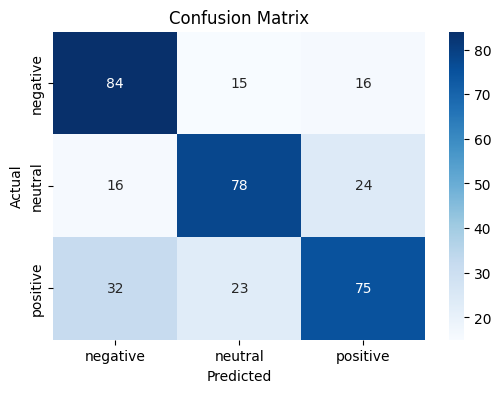

In [22]:
# Evaluate the tuned Random Forest on the test data
y_pred = best_rf_model.predict(X_test)

# Print classification report and accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=['negative', 'neutral', 'positive']))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Visualize the confusion matrix using seaborn heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['negative', 'neutral', 'positive'], yticklabels=['negative', 'neutral', 'positive'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [23]:
# lstm

In [24]:
!pip install keras-tuner -q

In [25]:
import numpy as np
from sklearn.model_selection import train_test_split  # Import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  # Import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import keras_tuner as kt
from tensorflow.keras.models import Sequential # Import Sequential from tensorflow.keras.models
from tensorflow.keras.layers import LSTM, Dropout, Dense # Import LSTM, Dropout, and Dense
from tensorflow.keras.callbacks import EarlyStopping # Import EarlyStopping


In [26]:
# ---------------------------- LSTM ----------------------------
# Use the same BERT vectorized embeddings as in Random Forest
X = vectorized_texts_bert
y = numeric_labels

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape for LSTM, but note that since BERT embeddings are static (not sequential),
# you don't need to add an extra dimension like with Word2Vec.
X_train = np.expand_dims(X_train, axis=1)  # Add a dummy "time step" axis
X_test = np.expand_dims(X_test, axis=1)

# Convert y_train to a NumPy array
y_train = np.array(y_train)

# Define the LSTM model using Keras Tuner
def build_lstm_model(hp):
    model = Sequential()
    model.add(LSTM(
        units=hp.Int('units', min_value=32, max_value=256, step=32),
        input_shape=(X_train.shape[1], X_train.shape[2]),
        return_sequences=False
    ))
    model.add(Dropout(rate=hp.Float('dropout', min_value=0.2, max_value=0.5, step=0.1)))
    model.add(Dense(
        units=hp.Int('dense_units', min_value=32, max_value=128, step=32),
        activation='relu'
    ))
    model.add(Dense(3, activation='softmax'))
    model.compile(
        optimizer=hp.Choice('optimizer', values=['adam', 'rmsprop']),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

# Continue with Keras Tuner for hyperparameter tuning (same as before)
tuner = kt.BayesianOptimization(
    build_lstm_model,
    objective='val_accuracy',
    max_trials=20,
    directory='my_tuning',
    project_name='bert_lstm'
)

# Callback for early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3)
tuner.search(X_train, y_train, epochs=10, validation_split=0.2, callbacks=[early_stopping])

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters()[0]

# Print the best hyperparameters
print(f"Best Hyperparameters: {best_hps.values}")

Trial 20 Complete [00h 00m 04s]
val_accuracy: 0.7353951930999756

Best val_accuracy So Far: 0.769759476184845
Total elapsed time: 00h 02m 14s
Best Hyperparameters: {'units': 64, 'dropout': 0.2, 'dense_units': 32, 'optimizer': 'adam'}


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                        │ (None, 64)                  │         213,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 3)                   │              99 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 215,427 (841.51 KB)

 Trainable params: 215,427 (841.51 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.5225 - loss: 0.9917 - val_accuracy: 0.6873 - val_loss: 0.7359
Epoch 2/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6285 - loss: 0.8390 - val_accuracy: 0.7113 - val_loss: 0.6837
Epoch 3/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6887 - loss: 0.7331 - val_accuracy: 0.7148 - val_loss: 0.6675
Epoch 4/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7042 - loss: 0.7003 - val_accuracy: 0.7079 - val_loss: 0.6792
Epoch 5/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7366 - loss: 0.6295 - val_accuracy: 0.6907 - val_loss: 0.7001
Epoch 6/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7375 - loss: 0.6146 - val_accuracy: 0.7113 - val_loss: 0.6738
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Test Accuracy: 0.6225895316804407
Classification Report:
               precision    recall  f1-score   support

    negative       0.59      0.77      0.67       115
     neutral       0.70      0.50 

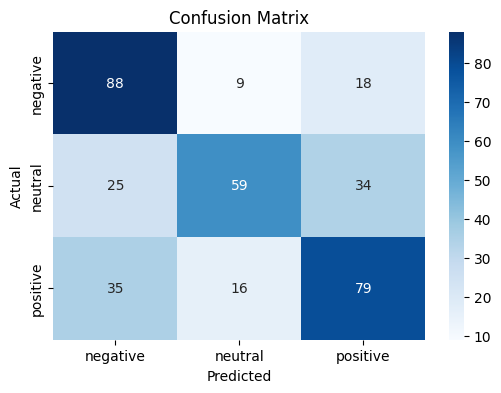

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

## Best Hyperparameters: {'units': 64, 'dropout': 0.2, 'dense_units': 32, 'optimizer': 'adam'}
# Function to build LSTM model with best hyperparameters
def build_best_lstm_model():
    model = Sequential()

    # LSTM layer
    model.add(LSTM(
        units=64,                      # Best 'units' value
        input_shape=(X_train.shape[1], X_train.shape[2]),  # Input shape
        return_sequences=False
    ))

    # Dropout layer to prevent overfitting
    model.add(Dropout(rate=0.2))         # Best 'dropout' value

    # Dense layer
    model.add(Dense(
        units=32,                        # Best 'dense_units' value
        activation='relu'
    ))

    # Output layer (3 classes: negative, neutral, positive)
    model.add(Dense(3, activation='softmax'))

    # Compile the model using the best optimizer
    model.compile(
        optimizer='adam',                # Best 'optimizer' value
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

# Build the LSTM model using the best hyperparameters
best_lstm_model = build_best_lstm_model()

# Display the model architecture
best_lstm_model.summary()

# Training the model
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

best_lstm_model.fit(
    X_train, y_train,
    epochs=10,
    validation_split=0.2,
    callbacks=[early_stopping]
)

# Evaluate the model on the test data
y_pred_probs = best_lstm_model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy}")

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=['negative', 'neutral', 'positive']))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Visualize the confusion matrix using seaborn heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['negative', 'neutral', 'positive'], yticklabels=['negative', 'neutral', 'positive'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()